<a href="https://colab.research.google.com/github/SatoshiYoshino/Python/blob/master/pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret

     |████████████████████████████████| 288 kB 3.9 MB/s 
     |████████████████████████████████| 167 kB 48.9 MB/s 
     |████████████████████████████████| 1.7 MB 52.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 46.4 MB/s 
     |████████████████████████████████| 1.3 MB 50.0 MB/s 
     |████████████████████████████████| 2.0 MB 58.0 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 15.5 MB 57.3 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 261 kB 60.0 MB/s 
     |████████████████████████████████| 6.8 MB 59.0 MB/s 
     |████████████████████████████████| 303 kB 72.1 MB/s 
     |████████████████████████████████| 102 kB 9.7 MB/s 
     |████████████████████████████████| 10.1 MB 48.1 MB/s 
     |█████████████████

In [3]:
from pycaret.regression import *
from pycaret.datasets import get_data

In [12]:
dataset = get_data('diamond')
# Diamndのデータを取得

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [14]:
exp = setup(dataset,target='Price')
# 集計対象をPriceとした。
# 項目のデータタイプがあっているかを確認して下記の四角い箱でEnter
# さまざまな指標が表示される
# 前処理が自動でセットアップしてくれている
# Priceの後ろに,をつけると設定情報が表示されて確認できる

,Description,Value
0,session_id,6225
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 28)"


In [17]:
compare_models()
# モデリングの比較。アルゴリズムを比較してくれる
# R2 決定係数が高い順で並ぶ。今回は、Extra Trees Regressorが一番良かったと出てくる
# 一番下にExtra Trees Regressorのパラメーターが表示される

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.484087e+02,2.477696e+06,1.535318e+03,9.764000e-01,0.0787,5.840000e-02,1.427
rf,Random Forest Regressor,7.431438e+02,2.630779e+06,1.574703e+03,9.749000e-01,0.0786,5.770000e-02,1.337
lightgbm,Light Gradient Boosting Machine,7.537379e+02,3.109590e+06,1.707255e+03,9.703000e-01,0.0767,5.590000e-02,0.077
gbr,Gradient Boosting Regressor,9.023009e+02,3.134437e+06,1.745833e+03,9.697000e-01,0.1015,7.720000e-02,0.304
dt,Decision Tree Regressor,9.569904e+02,4.142793e+06,2.004199e+03,9.602000e-01,0.1031,7.470000e-02,0.032
ridge,Ridge Regression,2.449041e+03,1.491709e+07,3.835655e+03,8.560000e-01,0.6429,2.906000e-01,0.017
lasso,Lasso Regression,2.448696e+03,1.497559e+07,3.844327e+03,8.554000e-01,0.6462,2.901000e-01,0.036
br,Bayesian Ridge,2.451227e+03,1.497227e+07,3.843682e+03,8.554000e-01,0.6387,2.907000e-01,0.023
llar,Lasso Least Angle Regression,2.389883e+03,1.500766e+07,3.846653e+03,8.552000e-01,0.6727,2.759000e-01,0.019
lr,Linear Regression,2.490085e+03,1.520187e+07,3.875739e+03,8.530000e-01,0.6216,2.963000e-01,0.022


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=6225, verbose=0, warm_start=False)

In [18]:
# ここまでではパラメーターのチューニングは行なっていないので調整したら他のモデルがよくなる可能性があるので３つくらい比較してみると良い

In [22]:
model = create_model('et')
# 今回使用するモデルを指定
# 交差検証　クロスバリデーションを行なってくれる（個々のモデルの汎化性能を評価する手法）
# Cross-validation : https://aiacademy.jp/media/?p=263
# それぞれの指標を試してみて平均の結果が出る。createを使うとクロスバリデーションを実行できる

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,720.8303,1.966738e+06,1402.4043,0.9794,0.0747,0.0568
1,736.9638,1.772569e+06,1331.3786,0.9807,0.0763,0.0589
2,677.8102,2.368631e+06,1539.0356,0.9751,0.0772,0.0543
3,875.7271,4.095501e+06,2023.7345,0.9636,0.0894,0.0632
4,719.4092,1.872720e+06,1368.4735,0.9805,0.0799,0.0603
5,909.4942,3.998429e+06,1999.6072,0.9696,0.0836,0.0593
6,807.6290,2.440654e+06,1562.2591,0.9807,0.0802,0.0587
7,659.4333,1.274608e+06,1128.9854,0.9869,0.0720,0.0549
8,602.3254,1.002095e+06,1001.0470,0.9875,0.0726,0.0556
9,774.4643,3.985019e+06,1996.2512,0.9595,0.0814,0.0619


In [24]:
print(model)
# modelのパラメーターが確認できる

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=6225, verbose=0, warm_start=False)


In [28]:
# ハイパーパラメーターのチューニング
# 先ほど作ったetが入ったmodelを（）の中に入れてチューニングしたモデルをtuned_modelに入れる
tuned_model=tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,798.5754,2.228895e+06,1492.9484,0.9767,0.0912,0.0672
1,827.1936,2.831588e+06,1682.7324,0.9692,0.0873,0.0656
2,773.0486,2.890771e+06,1700.2267,0.9697,0.0855,0.0626
3,915.6623,3.122926e+06,1767.1802,0.9722,0.0951,0.0698
4,764.9494,2.155592e+06,1468.1936,0.9775,0.0863,0.0655
5,959.0730,5.089969e+06,2256.0960,0.9612,0.0895,0.0662
6,835.7251,2.528000e+06,1589.9685,0.9800,0.0843,0.0639
7,681.1249,1.365648e+06,1168.6095,0.9860,0.0754,0.0609
8,631.9277,9.335997e+05,966.2296,0.9884,0.0804,0.0610
9,792.2074,5.738026e+06,2395.4178,0.9416,0.0835,0.0630


In [30]:
# 予測値をみたいときはチューニングしたモデルを入れてあげると予測値を算出することができる
# 6000行を７：３（1800行）で分けて入っていて実際のPrinceに対してLabelがどれくらいずれているか確認する。
# このデータではおおむね価格を予想できていることがわかる
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,823.4712,2.865894e+06,1692.8952,0.9729,0.0859,0.0658


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_AGSL,Price,Label
0,2.03,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,39605,40102.188518
1,1.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,10983,10796.599642
2,1.11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,6090,5922.331133
3,2.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18069,21112.118150
4,1.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,10600,10325.726297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,1.23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6335,6256.491006
1797,0.94,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4488,5267.551506
1798,1.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5809,5775.871836
1799,1.15,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8418,7957.170274


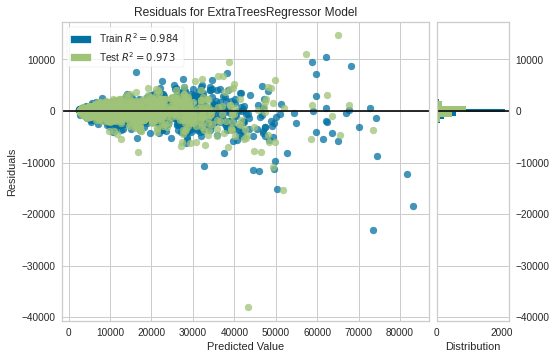

In [31]:
#　結果のプロット
# 実際の値からどれくらい離れているかの誤差について残差で表示される。0を中心にばらつきが少ない良い結果になっている
plot_model(tuned_model)

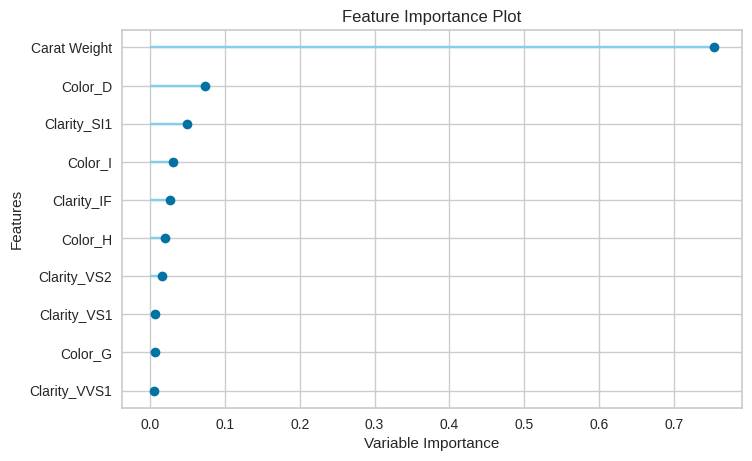

In [33]:
#　特徴量ごとの重要度が出てくる
plot_model(tuned_model, plot='feature')

In [ ]:
# こちらのyoutubeを参考に進めた。https://www.youtube.com/watch?v=35pS0YgMsAo